In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/dinhvietcuong1996/Lab-MachineLearningCourse/master/Lab03/bt_train.csv")
train.head()

,x1,x2,label
0,55.808717,54.602061,0
1,50.882672,52.736342,0
2,53.196444,44.208365,0
3,54.727839,60.406845,0
4,49.771372,48.405605,0


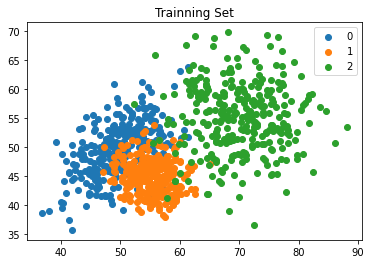

In [3]:
x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train==0], label = '0')
plt.scatter(x1_train[y_train == 1], x2_train[y_train==1], label = '1')
plt.scatter(x1_train[y_train == 2], x2_train[y_train==2], label = '2')

plt.title('Trainning Set')
plt.legend()

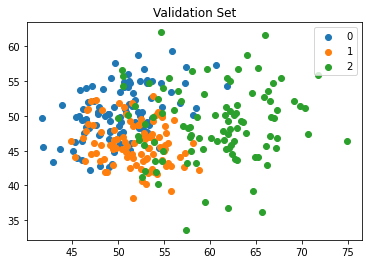

In [4]:
plt.figure()
valid = pd.read_csv("https://raw.githubusercontent.com/dinhvietcuong1996/Lab-MachineLearningCourse/master/Lab03/bt_valid.csv")
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values

plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid==0], label = '0')
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid==1], label = '1')
plt.scatter(x1_valid[y_valid == 2], x2_valid[y_valid==2], label = '2')

plt.title('Validation Set')
plt.legend()

In [5]:
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std

In [6]:
X_train = np.concatenate([x1_train.reshape(-1,1), x2_train.reshape(-1,1)], axis=-1)
X_valid = np.concatenate([x1_valid.reshape(-1,1), x2_valid.reshape(-1,1)], axis=-1)

In [7]:
def convert(arr):
  ans = []
  for i in arr:
    if(i == 0):
      ans.append([1,0,0])
    elif( i == 1):
      ans.append([0,1,0])
    else:
      ans.append([0,0,1])
  return ans

In [8]:
y_train_matrix = convert(y_train)
y_train_matrix = np.matrix(y_train_matrix)
y_valid_matrix = convert(y_valid)
y_valid_matrix = np.matrix(y_valid_matrix)

In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes =(5,5), random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [10]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 5), (5, 3)]

In [21]:
print('Accuracy on valid: ', np.mean(clf.predict(X_valid) == y_valid))

Accuracy on valid:  0.63


# **Bài 2**

**2.1 Define structure**

In [12]:
def define_structure(X, y):
  input_unit = 5 # size of input layer
  hidden_unit = 2 #hidden layer of size 2
  output_unit = 3 # size of output layer
  return (input_unit, hidden_unit, output_unit)
(input_unit, hidden_unit, output_unit) = define_structure(X_train, y_train)
print("The size of the input layer is: " + str(input_unit))
print("The size of the hidden layer is: " + str(hidden_unit))
print("The size of the output layer is: " + str(output_unit))

The size of the input layer is: 5
The size of the hidden layer is: 2
The size of the output layer is: 3


**2.2 Initialize Model Parameter**

In [13]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    W3 = np.random.randn(output_unit, hidden_unit)*0.01
    b3 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  }
    
    return parameters

**2.2 Forward Propagation**

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z2)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z2)

    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2, "Z3": Z3,"A3": A3}
    
    return A3, cache

**2.3 Compute Cost**

In [15]:
# def cross_entropy_cost(A1, A2, A3, Y1, Y2, Y3, parameters):
#     # number of training example
#     m = Y.shape[0] 
#     # Compute the cross-entropy cost
#     logprobs = np.multiply(np.log(A1), Y1) + np.multiply((Y2), np.log(A2)) + np.multiply((Y3), np.log(A3))
#     cost = - np.sum(logprobs) / m
#     cost = float(np.squeeze(cost))
                                    
#     return cost

In [16]:
# def backward_propagation(parameters, cache, X, Y):
#     #number of training example
#     m = X.shape[0]
    
#     W1 = parameters['W1']
#     W2 = parameters['W2']
#     W3 = parameters['W3']
#     A1 = cache['A1']
#     A2 = cache['A2']
#     A3 = cache['A3']

   
#     dZ3 = A3-Y
#     dW3 = (1/m) * np.dot(dZ3, A2.T)
#     db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
#     dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
#     dW2 = (1/m) * np.dot(dZ2, X.T) 
#     db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    
#     grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
#     return grads

**2.4 Gradient Descent (update parameters)**

In [17]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2, "W3": W3,"b3": b3}
    
    return parameters

**2.5 Neural Network Model**

In [18]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)
    input_unit = define_structure(X, Y)[0]
    output_unit = define_structure(X, Y)[2]
    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    for i in range(0, num_iterations):
        A3, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A3, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 3 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters
# parameters = neural_network_model(X_train, y_train, 2, num_iterations=1000)

In [19]:
def prediction(parameters, X):
    A3, cache = forward_propagation(X, parameters)
    predictions = np.round(A3)
    return predictions

In [20]:
# predictions = prediction(parameters, X_train)
# print ('Accuracy Train: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100) + '%')
# predictions = prediction(parameters, X_test)
# print ('Accuracy Test: %d' % float((np.dot(y_valid, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_valid.size)*100) + '%')